#  `dingo` : A python library for metabolic networks sampling and analysis

This tutorial is designed to showcase a few key functionalities of the Dingo project after complete installation.

For complete overview please check `dingo_tutorial.ipynb`

In [1]:
import os
import numpy as np

And import the `MetabolicNetwork` class of `dingo`! 

In [2]:
from dingo import MetabolicNetwork

Now, you can load a metabolic model. 
Currently, `dingo` gets a `.json` model format.

Ensure that the current working directory is set to `dingo`

In [3]:
import os
os.getcwd()

'/home/lightmate/Desktop/dingo/tutorials'

In [4]:
%cd ..

/home/lightmate/Desktop/dingo


In [5]:
os.getcwd()

'/home/lightmate/Desktop/dingo'

tutorial

In [6]:
model = MetabolicNetwork.from_json('ext_data/e_coli_core.json')

Let's see what the model comprises. 

First of all, let's see the metabolites ($m$) included in our model. 
Here is the first 10 of them. 

In [7]:
print('Number of metabolites in my model: ', len(model.metabolites))
print('Here are the first 10 metabolites in your model: ', model.metabolites[:9])

Number of metabolites in my model:  72
Here are the first 10 metabolites in your model:  ['glc__D_e', 'gln__L_c', 'gln__L_e', 'glu__L_c', 'glu__L_e', 'glx_c', 'h2o_c', 'h2o_e', 'h_c']


And now, let us have a look in the reactions ($n$) that occur. 
Again, here is the first 10 reactions. 

In [8]:
print('Number of reactions in my model: ', len(model.reactions))
print('Here are the first 10 reactions in your model: ', model.reactions[:9])

Number of reactions in my model:  95
Here are the first 10 reactions in your model:  ['PFK', 'PFL', 'PGI', 'PGK', 'PGL', 'ACALD', 'AKGt2r', 'PGM', 'PIt2r']


Moreover, let us see the stoichiometrix matrix ($S$) of our model.

In [9]:
model.S

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.]])

And its dimensions are of course $m*n$.

In [10]:
model.S.shape

(72, 95)

Last but not least, let us have a look at the **biomass** or **objective function** of our model. 

In [11]:
model.biomass_function

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

As you can see, this array has only a single `1` in index `24`.
Let's see which function is this. 

In [12]:
model.reactions[24]

'BIOMASS_Ecoli_core_w_GAM'

Ok, so what exactly is the biomass function? 🤔 

Let's print the `24` column of our $S$ matrix to see what we have there.

In [13]:
import sys

In [14]:
# We import numpy and set the threshold parameter to max to enable the display of all the elements of the array
np.set_printoptions(threshold=sys.maxsize)
model.S[:,24]

array([  0.    ,  -0.2557,   0.    ,  -4.9414,   0.    ,   0.    ,
       -59.81  ,   0.    ,  59.81  ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,  -3.547 ,   3.547 ,  13.0279,
       -13.0279,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,  -1.496 ,  -1.7867,  -0.5191,   0.    ,  59.81  ,
         0.    ,   0.    ,   0.    ,  -2.8328,   0.    ,   0.    ,
         0.    ,  -0.8977,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,  -3.7478,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,  59.81  ,   4.1182,   0.    ,   0.    ,
       -59.81  ,   0.    ,   0.    ,   0.    ,   3.7478,   0.    ,
        -0.361 ,   0.    ,   0.    ,  -0.0709,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,  -0.129 ,  -0.205 ])

And just to make sure, let's print the length of this array too. 

In [15]:
model.S[:,24].shape

(72,)

As expected, the length of the biomass array equals to the number of the metabolites of our model. 

In [16]:
len(model.metabolites)

72

Moreover, you need to remember that the indexes of those 2 arrays are in order, meaning that the actual biomass function would be as follows:

$ 59.81*adp\_c - 59.81*atp\_c -0.0709*f6p\_c + ...  -0.8977*r5p\_c$

You can also have a look at the `dingo` related parameters of the model you just built.

In [17]:
model.parameters

{'opt_percentage': 100,
 'distribution': 'uniform',
 'nullspace_method': 'sparseQR',
 'fast_computations': True}

### ..to optimize an objective function (FBA)

To perform FBA with `dingo`, you just need to call the according method ([`fba`](https://github.com/GeomScale/dingo/blob/a76b4be22f33feac86dff38746c7f2706afb2b67/dingo/MetabolicNetwork.py#L107)) of the `model` you built using the [`MetabolicNetwork`](https://github.com/GeomScale/dingo/blob/a76b4be22f33feac86dff38746c7f2706afb2b67/dingo/MetabolicNetwork.py#L21) class. 

FBA is a lot easier both from the computational and the geometical point of view and it takes much less time. 

In [18]:
%%capture
fba_output = model.fba()

As already mentioned, FBA identifies an **optimal** flux distribution by optimizing a linear **objective function**.

So the output of FBA can be considered as a single sample of the flux sampling method described above. Thus, if we check on the output this time we will see that it has 2 attributes:
* the **flux vector** (meaning the set of the reactions flux values in the same solution) which maximizes the objective function.
* the **flux value** that the objective function achieves at the maximum

In [19]:
np.set_printoptions(threshold=None)

max_biomass_flux_vector = fba_output[0]
max_biomass_objective = fba_output[1]

print('This is the optimal flux vector according to the biomass objective function: ', max_biomass_flux_vector)
print('----------')
print('This is the value of that optimal solution of the objective function: ', max_biomass_objective)

This is the optimal flux vector according to the biomass objective function:  [ 7.47738196e+00  0.00000000e+00  4.86086115e+00 -1.60235261e+01
  4.95998494e+00  0.00000000e+00  0.00000000e+00 -1.47161396e+01
  3.21489505e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.50430947e+00  6.00724958e+00  6.00724958e+00  8.39000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.06437566e+00  4.55140098e+01  0.00000000e+00  1.75817744e+00
  8.73921507e-01  0.00000000e+00 -2.28098333e+01  2.67848185e+00
  6.00724958e+00 -2.28150309e+00  0.00000000e+00  4.35989853e+01
  0.00000000e+00  1.47161396e+01  0.00000000e+00  0.00000000e+00
  1.00000000e+03 -5.06437566e+00  1.49698376e+00  0.00000000e+00
  1.49698376e+00  1.18149809e+00  7.47738196e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.28098333e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00000000e+01
  0.00000000e+00  0.00000000e+00  1.75308654e+01  2.91758271e+01
  0.00000000

💪 Even it is quite common that the objective function is the biomass function of a model, **you can change your objective function** as you wish and use any reaction as your objective function.

For example, to maximize the 1st reaction of the model, we first build an array with the number of reactions of our model with `0`s and then we set only its first elemet equal to `1`:

In [20]:
n = model.num_of_reactions()
obj_fun = np.zeros(n)
obj_fun[0] = 1

Now we can replace the `biomass_function` parameter of our model with our new objective function

In [21]:
model.biomass_function = obj_fun

And if we now ask to see our new objective function: 

In [22]:
model.biomass_function

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

You see that the `1` is now not in the `24` index but in the first. 🎉

So if we run now a FBA here is what we will get. 

In [23]:
%%capture
fba_output_new_obj = model.fba()

In [24]:
max_biomass_flux_vector_new_obj = fba_output_new_obj[0]
max_biomass_objective_new_obj = fba_output_new_obj[1]
print('This is the optimal flux vector according to my objective function: ', max_biomass_flux_vector_new_obj)
print('----------')
print('This is the value of that optimal solution of the new objective function: ', max_biomass_objective_new_obj)

This is the optimal flux vector according to my objective function:  [ 176.61    0.     10.    -20.      0.      0.      0.    -20.      0.
    0.      0.      0.      0.     20.     20.      8.39    0.      0.
    0.      0.     20.    135.      0.     10.      0.      0.    -60.
    0.     20.      0.      0.    120.      0.     20.      0.      0.
 1000.    -20.      0.      0.      0.      0.     10.      0.      0.
    0.     60.      0.      0.      0.      0.    -10.      0.      0.
    0.     60.      0.      0.      0.    -60.      0.      0.      0.
   10.    166.61    0.      0.    980.      0.     20.      0.      0.
   20.     10.      0.      0.      0.      0.      0.      0.      0.
  -60.     20.      0.      0.      0.      0.     20.      0.      0.
  100.     20.      0.     60.     20.  ]
----------
This is the value of that optimal solution of the new objective function:  176.60999999999996


### ..to find the minimum and maximum flux for each reaction (FVA)

Let's run FVA using that; this will take a while 😉

In [25]:
model.reactions[0]

'PFK'

As we said earlier, FVA gets the min and max value of each reaction flux that can still satisfy the constraints of the metabolic model.

**Remember!** 

In the previous step, we replaced the `biomass_function` of our model. So if we run FVA in our current model, then the first reaction of our model 

In [26]:
%%capture
# Run FVA
fva_output = model.fva()

# Get min and max flux values
pfk_min_fluxes = fva_output[0]
pfk_max_fluxes = fva_output[1]

# Get the max flux distribution and the max biomass value when the objective function is maximum
pfk_max_biomass_flux_vector = fva_output[2]
pfk_max_biomass_objective = fva_output[3]

We can go with that or if we need to go back in using the actual biomass function of our model, we can either do the same process as before to change again the `biomass_function` or we can just build a new instance of the `MetabolicNetwork` class. 

In [27]:
%%capture
# Build new instance of the model
model = MetabolicNetwork.from_json('ext_data/e_coli_core.json')

# Run FVA
fva_output = model.fva()

# Get min and max flux values
min_fluxes = fva_output[0]
max_fluxes = fva_output[1]

# Get the max flux distribution and the max biomass value when the objective function is maximum
max_biomass_flux_vector = fva_output[2]
max_biomass_objective = fva_output[3]

Let's see how they're different!

In [28]:
print('This is the flux vector with the minimum values of each flux when the PFK reaction gets maximum: ', pfk_min_fluxes)
print('This is the flux vector with the minimum values of each flux when the biomass function gets maximum: ', min_fluxes)

print('----------')

print('This is the flux vector with the maximum values of each flux when the PFK reaction gets maximum: ', pfk_max_fluxes)
print('This is the flux vector with the maximum values of each flux when the biomass function gets maximum: ', max_fluxes)

This is the flux vector with the minimum values of each flux when the PFK reaction gets maximum:  [ 1.76609999e+02  0.00000000e+00  9.99999867e+00 -2.00000000e+01
  0.00000000e+00 -1.53846148e-07 -9.30232495e-08 -2.00000000e+01
  0.00000000e+00 -1.33333325e-07 -1.53846148e-07 -2.35294110e-07
  0.00000000e+00  1.99999996e+01  1.99999996e+01  8.39000000e+00
  0.00000000e+00 -2.35294110e-07  0.00000000e+00  0.00000000e+00
  1.99999990e+01  1.34999999e+02  0.00000000e+00  9.99999900e+00
  0.00000000e+00 -1.53846148e-07 -6.00000000e+01 -3.86129825e-09
  1.99999996e+01 -4.44444426e-07  0.00000000e+00  1.19999999e+02
 -1.29032255e-07  1.99999996e+01  0.00000000e+00 -1.33333325e-07
  1.99999996e+01 -2.00000000e+01 -9.46457589e-10  0.00000000e+00
 -9.61027051e-10 -2.85630235e-09  9.99999956e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.99999993e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00000000e+01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  5.99999

Apparently (and obviously) they are quite different!

The same thing is with the flux vector and the max biomass objective.

### ..to sample the flux space of your model

Finally, one may sample the model's flux space using the [`PolytopeSampler`](https://github.com/GeomScale/dingo/blob/a76b4be22f33feac86dff38746c7f2706afb2b67/dingo/PolytopeSampler.py#L28) class of `dingo`. 

To do so, you first build an instance of this class based on your `model`:

In [29]:
from dingo import PolytopeSampler
sampler = PolytopeSampler(model)

Then, the [`generate_steady_states()`](https://github.com/GeomScale/dingo/blob/a76b4be22f33feac86dff38746c7f2706afb2b67/dingo/PolytopeSampler.py#L119) method can be used for flux sampling. 

This method optionally gets as arguments the following: 

* the **effective sample size (ESS)** asked (by default `ESS = 1000`). ESS is the number of effectively independent draws from the posterior distribution that the Markov chain is equivalent to.
 
* the **Potential Scale Reduction Factor (PSRF)** of each marginal flux to  get an upper bound equal to 1.1 (by default that is set as `False`)

So, let's sample!

In [30]:
%%capture
steady_states = sampler.generate_steady_states(ess = 1000, psrf = True) # this took a little bit more than 5 minutes

phase 1: number of correlated samples = 500, effective sample size = 4, ratio of the maximum singilar value over the minimum singular value = 1935.12
phase 2: number of correlated samples = 500, effective sample size = 5, ratio of the maximum singilar value over the minimum singular value = 171.436
phase 3: number of correlated samples = 500, effective sample size = 27, ratio of the maximum singilar value over the minimum singular value = 133.184
phase 4: number of correlated samples = 500, effective sample size = 84, ratio of the maximum singilar value over the minimum singular value = 57.8386
phase 5: number of correlated samples = 500, effective sample size = 147, ratio of the maximum singilar value over the minimum singular value = 2.95199
phase 6: number of correlated samples = 1800, effective sample size = 755


 [1]maximum marginal PSRF: 1.38012
[2]maximum marginal PSRF: 1.19941
[2]total ess: 1018
[2]maximum marginal PSRF: 1.07896
[2]total ess: 1013


Above, a great number of values of the flux of each reaction is computed, given that the system is always at a steady state. 

That means that we now have a **flux distribution** (all the values computed for the flux of a specific reaction) for each reaction of our model!

Obviously, we have as many flux distributions as the reactions of our model:

In [31]:
print('Number of reactions in my model: ', len(model.reactions))
print('Number of flux distributions sampled: ', steady_states.shape[0])

Number of reactions in my model:  95
Number of flux distributions sampled:  95


And each flux distribution has as many flux values as `dingo` required to reach the ESS asked. 

In [32]:
print('Number of flux values of the flux distributions returned: ', steady_states.shape[1])

Number of flux values of the flux distributions returned:  3300


Let us now assume that we are interested in a certain reaction of our model, for example the last reaction of the glycolysis which is catalyzed by the Pyruvate kinase (PYK) enzyme. 

We first need to look in the `model.reactions` list and find the index of the `PYK` reaction; the enzyme is usually the name of reaction. 

In [33]:
model.reactions.index('PYK')

23

Now that we know the index of the reaction of our interest, we can use the [`plot_histogram`](https://github.com/GeomScale/dingo/blob/a76b4be22f33feac86dff38746c7f2706afb2b67/dingo/utils.py#L177) function of `dingo` to plot its corresponding flux distribution. 

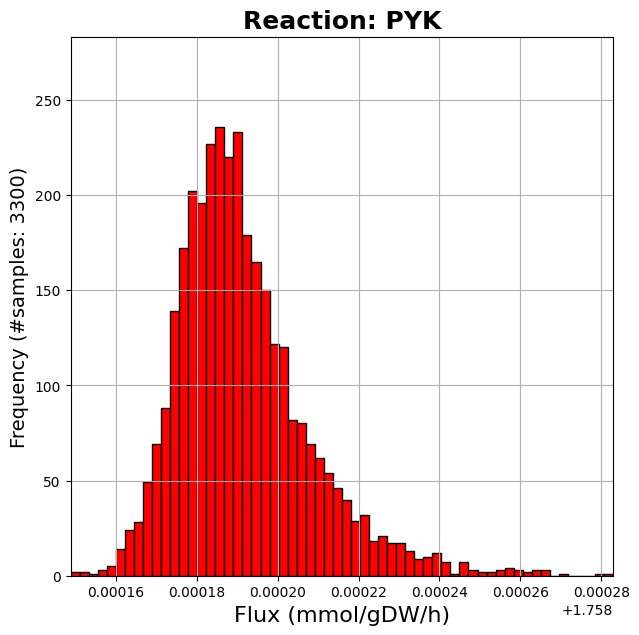

In [34]:
from dingo import plot_histogram

reactions = model.reactions
plot_histogram(
        steady_states[23],  # here we set which reaction's flux we need to get 
        reactions[23],      # here we provide the name of the reaction
        n_bins = 60,
)

From the flux distribution of PYK we can that most values fall between 1.7 and 1.9 and that it looks approximately normal, with a mean value at 1.775 mmol/gDW/h (millimoles per gram dry weight per hour).


In [35]:
!pip install --upgrade nbformat


[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [36]:
from dingo.illustrations import plot_copula

reaction_1 = [steady_states[23], reactions[23]]
reaction_2 = [steady_states[21], reactions[21]]

plot_copula(reaction_1, reaction_2, n = 5, width = 900 , height = 600, export_format = "svg")


Applications of flux sampling can provide great insight in many ways. 

Based on the [iAB-AMØ-1410](https://doi.org/10.1038/msb.2010.68) genome-scale metabolic model of human alveolar macrophages and the SARS-CoV-2 virus biomass objective function (VBOF) they built, [Renz et al. (2020)](https://doi.org/10.1093/bioinformatics/btaa813) investigated for alterations in the metabolism to come up with potential antiviral targets. 

In line with the findings of Renz et al. (2020), flux sampling in the metabolic model built from the macrophage model and the VBOF using `dingo` indicates **guanylate kinase (GK1)** as a potential antiviral target. 
Flux sampling was perfored first with no objective function for the virus and then after maximizing the VBOF built by Renz et al. (2020). 

<img src="https://drive.google.com/uc?id=1IOdSscVP0HoTRctQuSCywgIXokUNE-_v" height=400>




------

We hope you will find dingo useful and easy-to-use!

For anything which might be needed, don't hesitate to open an issue on the project's GitHub repo!


---

## References

* Palsson Bernhard. [Systems biology](https://www.cambridge.org/core/books/systems-biology/7F8445BC87019806B3625DFC4B5C27D4). Cambridge university press, 2015. 

* Orth Jeffrey D., Ines Thiele, and Bernhard Ø. Palsson. ["What is flux balance analysis?."](https://doi.org/10.1038/nbt.1614) Nature biotechnology 28.3 (2010): 245-248.

*  Chalkis Apostolos, Fisikopoulos Vissarion, Tsigaridas Elias and Zafeiropoulos Haris ["Geometric Algorithms for Sampling the Flux Space of Metabolic Networks"](https://drops.dagstuhl.de/opus/volltexte/2021/13820/pdf/LIPIcs-SoCG-2021-21.pdf)

* Schellenberger, Jan, and Bernhard Ø. Palsson. ["Use of randomized sampling for analysis of metabolic networks."](https://doi.org/10.1074/jbc.R800048200) Journal of biological chemistry 284, no. 9 (2009): 5457-5461.

## The GeomScale project

[Geomscale](https://geomscale.github.io/) is a research and development 
project that delivers open source code for state-of-the-art algorithms at the intersection of data science, optimization, geometric, and statistical computing. 

`dingo` is based on the [`volesti` package](https://github.com/GeomScale/volesti), an open source C++ library for volume approximation and sampling of convex bodies.

GeomScale is part of [NumFOCUS](https://numfocus.org/) and is a Google Summer of Code [(GSoC) organization](https://summerofcode.withgoogle.com/organizations/5553085268623360/). 

<br/>

<img src="https://drive.google.com/uc?id=1PTSnQi7ev1Dv0BwffvFWz4jT5zdtCmqL" height=200>